#### File Read In

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv(r'C:\Users\casocha\Desktop\Kaggle\titanic/train.csv')
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Set Style

In [3]:
sns.set_style("whitegrid")
#sns.set_style("dark")
#sns.set_style("ticks")
#sns.set_style("white")

#### Set Context

In [4]:
#sns.set_context("paper")
#sns.set_context("talk")
#sns.set_context("poster")
#sns.set_context("notebook")

#### Set Color

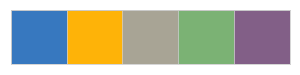

In [5]:
#sns.palplot(sns.color_palette("husl", 5))
#sns.palplot(sns.color_palette("BuGn_r"))
#sns.palplot(sns.color_palette("Paired"))

#https://xkcd.com/color/rgb/
colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
sns.palplot(sns.xkcd_palette(colors))

set_color = sns.xkcd_palette(colors)

#### Heatmap w/ Mask

Text(0.5,1,'Heatmap of Attribute Correlation with Survived')

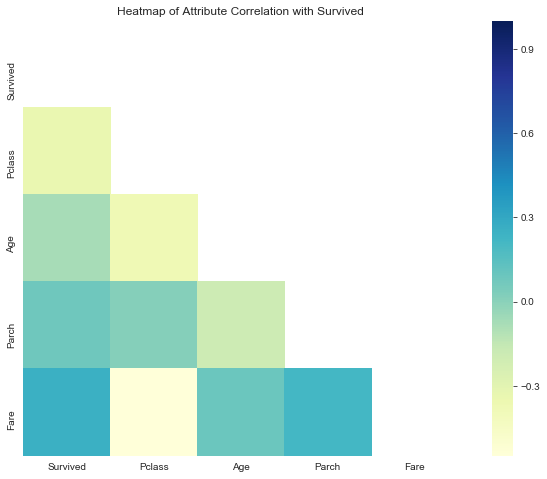

In [6]:
fig, axarr = plt.subplots(1, 1, figsize=(12, 8))
wh1 = df[['Survived','Pclass',
'Sex',
'Age',
'Parch',
'Fare',
'Embarked']] #Subsetting the data
cor = wh1.corr() #Calculate the correlation of the above variables
mask = np.zeros_like(cor)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(cor, mask = mask,square = True, cmap="YlGnBu") #Plot the correlation as heat map
plt.title('Heatmap of Attribute Correlation with Survived')

#### Facet Grid

Text(0.5,1,'Facet Grid of Fare by Passenger Class')

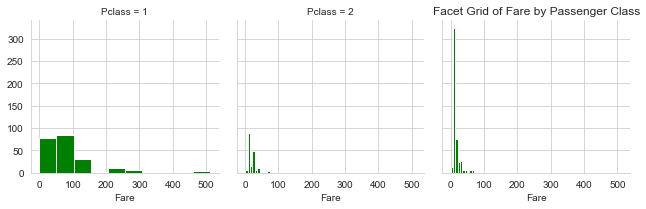

In [7]:
g = sns.FacetGrid(df, col="Pclass")
g = g.map(plt.hist,'Fare',color="g")
plt.title('Facet Grid of Fare by Passenger Class')

Text(0.5,1,'Facet Grid of Fare by Passenger Class')

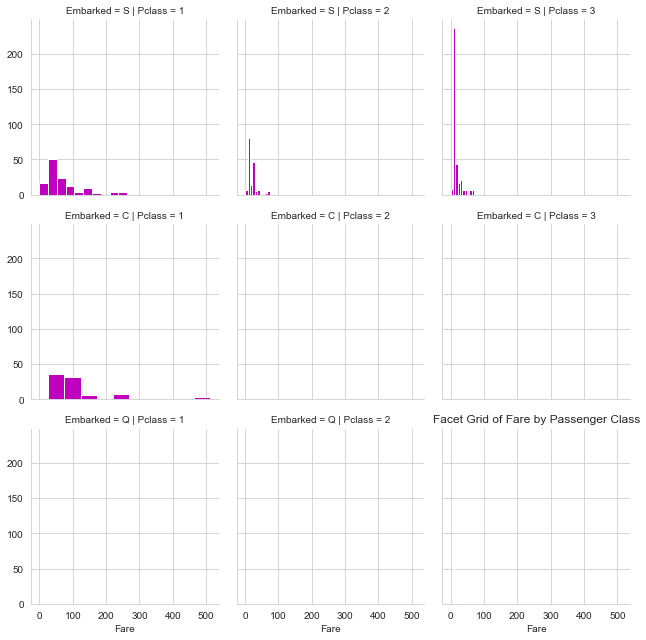

In [8]:
g = sns.FacetGrid(df, col="Pclass", row ='Embarked')
g = g.map(plt.hist,'Fare',color="m")
plt.title('Facet Grid of Fare by Passenger Class')

#### Overlapping KDE

C:\Users\casocha\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Log Transformation of Fare by Pclass')

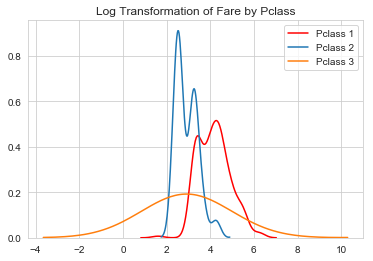

In [9]:
sns.kdeplot(df[df['Pclass']==1].loc[:,'Fare'].apply(np.log),label="Pclass 1",color='r')
sns.kdeplot(df[df['Pclass']==2].loc[:,'Fare'].apply(np.log), bw=.2, label="Pclass 2")
sns.kdeplot(df[df['Pclass']==2].loc[:,'Fare'].apply(np.log), bw=2, label="Pclass 3")
plt.title('Log Transformation of Fare by Pclass')

#### Catplot - Boxen w/ Subplots

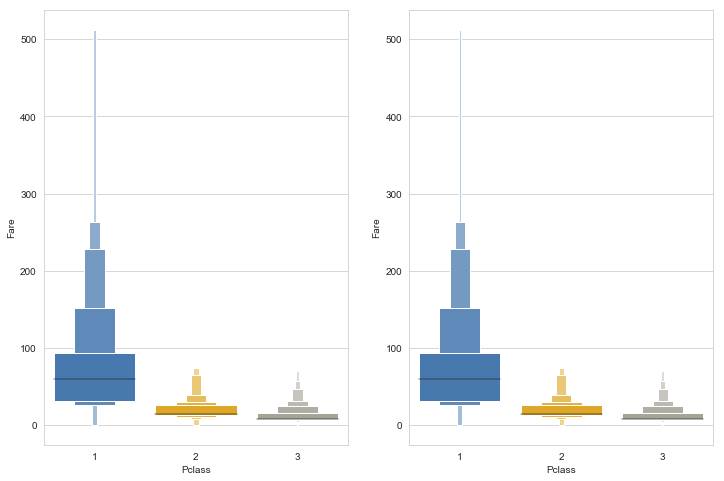

In [21]:
fig, axarr = plt.subplots(1, 2, figsize=(12, 8))
sns.catplot(x="Pclass", y="Fare", kind="boxen",
            data=df,ax=axarr[0], palette=set_color);
sns.catplot(x="Pclass", y="Fare", kind="boxen",
            data=df,ax=axarr[1], palette=set_color);
plt.close(2)
plt.close(3)

#### Scatter Plot

Text(0,0.5,'Fare')

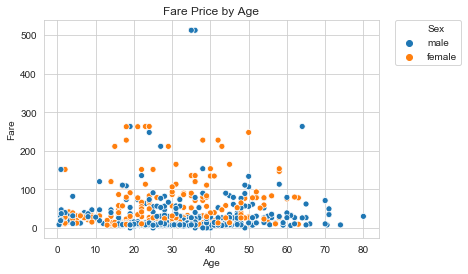

In [11]:
plt.title("Fare Price by Age")
sns.scatterplot(x = 'Age',y="Fare", 
                hue = 'Sex',data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Age')
plt.ylabel('Fare')

#### Point Plot

Text(0,0.5,'Value')

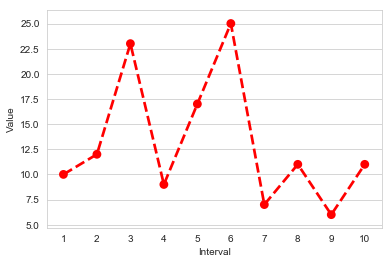

In [12]:
interval = [1,2,3,4,5,6,7,8,9,10]
value = [10,12,23,9,17,25,7,11,6,11]
val = pd.DataFrame(interval,value)
val = val.reset_index()
sns.pointplot(x = 0,y='index', 
                data=val,color='r',markers=['o'],linestyles=["--"])
plt.xlabel('Interval')
plt.ylabel('Value')

#### Pair Grid

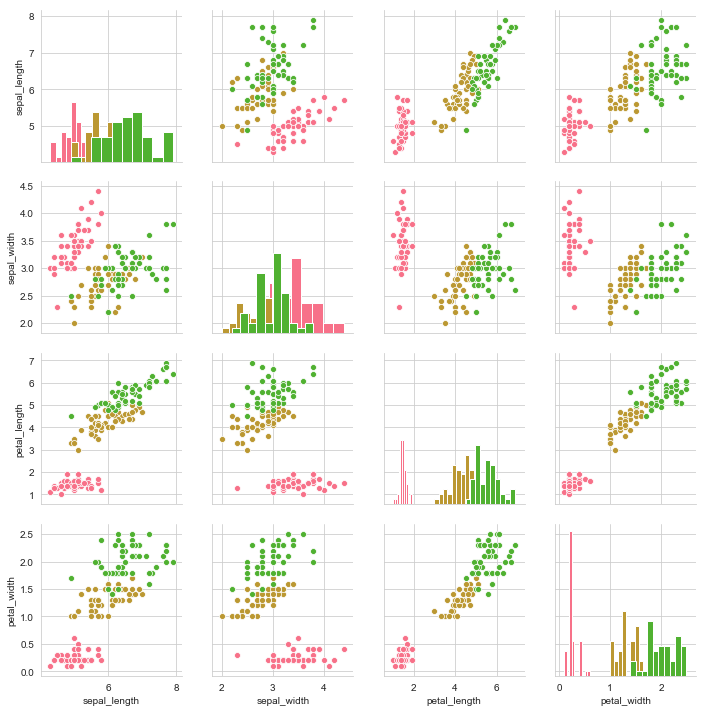

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
pal = sns.color_palette("husl")
iris = sns.load_dataset("iris")
g = sns.PairGrid(iris,hue='species',palette=pal)
g = g.map_diag(plt.hist)
g = g.map_offdiag(sns.scatterplot)

#### Joint Plot

C:\Users\casocha\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


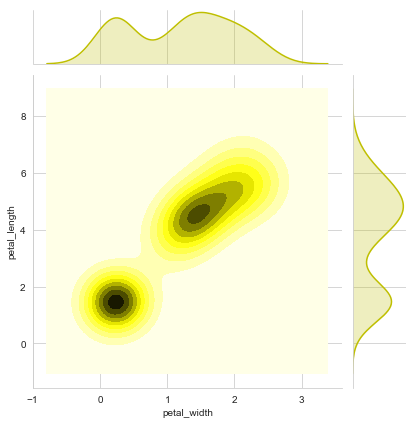

In [14]:
g = sns.jointplot("petal_width", "petal_length", data=iris, kind="kde",color='y')

#### Swarm Plot

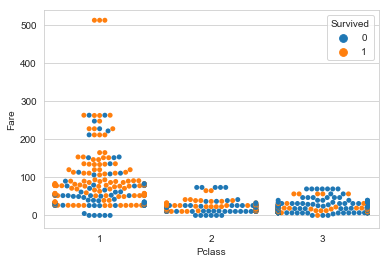

In [15]:
sns.swarmplot(x="Pclass", y="Fare", data=df, hue = 'Survived')